In [1]:
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import numpy as np
import jupyter
import matplotlib

In [2]:
def getdata(file):
    X, y = load_svmlight_file(file)
    X = X.toarray()
    X_list = X.tolist()
    for x in X_list:
        x.append(1.0)
    X = np.array(X_list)
    y = np.reshape(y,[y.shape[0],1])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
    return (X_train, X_test, y_train, y_test)

In [3]:
def f(x,w):
    sum=0
    for i in range(0,13):
        sum+=w[i]*x[i]
    return sum

In [4]:
def loss(y,X,w):
    sum=0
    for i in range(0,len(y)-1):
        sum+=np.square(y[i]-f(X[i],w))
    sum = sum/(2*X.shape[0])
    return sum

In [5]:
def loss_g(X,y,w):
    return np.dot(np.dot(X.T,X),w)-np.dot(X.T,y)

In [6]:
X_train, X_test, y_train, y_test=getdata("housing")

In [7]:
w=np.zeros([14,1])
n=0.00001
Lt=[]
Lv=[]
graph_x = []

In [8]:
for i in range(1,500):
    graph_x.append(i)
    G=loss_g(X_train,y_train,w)
    w-=n*G
    l_train=loss(y_train,X_train,w)
    l_validation=loss(y_test,X_test,w)
    Lt.append(l_train)
    Lv.append(l_validation)

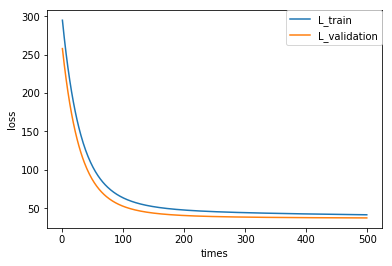

In [15]:
from matplotlib import pyplot
pyplot.xlabel('times')
pyplot.ylabel('loss')
pyplot.plot(graph_x,Lt,label="L_train")
pyplot.plot(graph_x,Lv,label="L_validation")
pyplot.legend(bbox_to_anchor=(1.0, 1), loc=1, borderaxespad=0.)  
pyplot.show()